___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" />
    
    
### <font color='navy'> Modelado de pronóstico de series de tiempo

**Nombres:**
- Judith Alejandra Hinojosa Rábago
-
-

**Fecha:** 2 de mayo del 2024.

**Expedientes:**
- 737456
-
-

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [https://github.com/judith-ale/proyecto_modulo1](https://github.com/judith-ale/proyecto_modulo1)

# Proyecto Final: Detección de anomalías para el sistema de unidades de producción de aire de un tren

## Tabla de contenidos

- [Portada](#Modelado-de-pronóstico-de-series-de-tiempo)
- [1 Objetivos](#1-Objetivos-[volver])
  - [1.1 Objetivo general](#1.1-Objetivo-general)
  - [1.2 Objetivos específicos](#1.2-Objetivos-específicos)
- [2 Definición del problema](#2-Definición-del-problema-[volver])
- [3 Nodos y variables](#3-Nodos-y-variables-[volver])
- [4 Obtención de la base de datos](#4-Obtención-de-la-base-de-datos-[volver])
- [5 Visualización de resultados](#5-Visualización-de-resultados-[volver])
- [6 Conclusiones](#6-Conclusiones-[volver])
- [7 Referencias](#7-Referencias-[volver])

***

## 1 Objetivos [<small>[volver]</small>](#Contenido)

> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser **concretos, evaluables y verificables.**
> - Deben ser escritos en infinitivo.

### 1.1 Objetivo general
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.

### 1.1 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

***

## 2 Definición del problema [<small>[volver]</small>](#Contenido)
> Se debe describir en una cuartilla máximo cuál es el escenario de negocio que se va a modelar, identificar cuáles son los supuestos que defines en el negocio y cuáles son los "nodos" o "escenarios" que identificas necesarios simular y porqué. Debes elaborar un diagrama de inicio a fin, identificando los "nodos" o "escenarios" a simular.

***

## 3 Nodos y variables [<small>[volver]</small>](#Contenido)
> En este apartado el objetivo es identificar los problemas que se van a abordar, para examinar la factibilidad y viabilidad de la simulación de los nodos escogidos. Posteriormente se debe de argumentar del porqué de los nodos escogidos.

***

## 4 Obtención de la base de datos [<small>[volver]</small>](#Contenido)
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.

***


## 5 Visualización de resultados [<small>[volver]</small>](#Contenido)
> Para cada uno de los temas del curso, realizar la estimación y predicción de errores de los algoritmos propuestos. Al final luego de obtener los resultados de cada tema realizar una comparación de los resultados lineales y no lineales y concluir los distintos resultados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ITESO/24P/MODELOS NO LINEALES PARA PRONÓSTICOS/proyecto

### Importación de librerías

In [ ]:
import pandas as pd

### Descripción general del dataset

In [10]:
data = pd.read_csv("data/MetroPT3(AirCompressor).csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [15]:
data

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [11]:
data.describe().round(3)

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000
mean,7.584735e+06,1.368,8.985,7.568,0.056,8.985,62.644,2.050,0.837,0.161,0.920,0.833,0.003,0.991,0.904,0.937
std,4.379053e+06,3.251,0.639,3.333,0.382,0.638,6.516,2.302,0.369,0.367,0.272,0.373,0.058,0.092,0.294,0.243
min,0.000000e+00,-0.032,0.730,-0.036,-0.032,0.712,15.400,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.792368e+06,-0.014,8.492,8.254,-0.022,8.494,57.775,0.040,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000
50%,7.584735e+06,-0.012,8.960,8.784,-0.020,8.960,62.700,0.045,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000
75%,1.137710e+07,-0.010,9.492,9.374,-0.018,9.492,67.250,3.808,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000
max,1.516947e+07,10.676,10.302,10.288,9.844,10.300,89.050,9.295,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Limpieza de datos y preprocesamiento

#### Eliminamos la columna innecesaria

In [13]:
data = data.drop(columns='Unnamed: 0')

#### Transformamos la columna de tiempo en un tipo de variable `datetime`

In [18]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

#### Añadir columna de variable categórica objetivo

El dataset no tiene el reporte de fallo por lo que es necesario añadirla, la información necesaria se provee en la siguiente tabla:

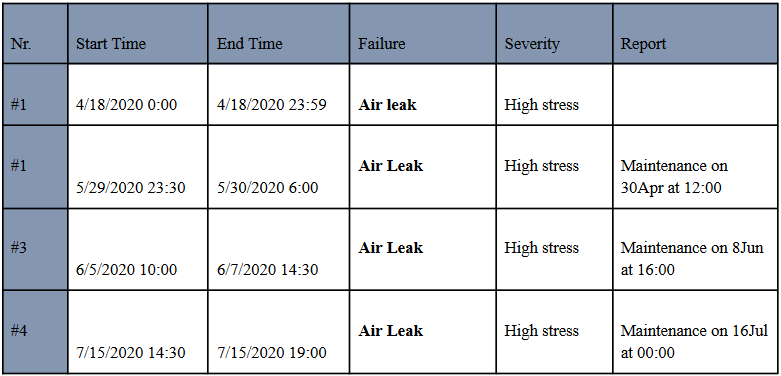

Convertimos los tiempos de inicio y término de las fallas a valores tipo `datetime` con el objetivo de poder comparar por rangos con los datos de la tabla.

In [19]:
start_time = pd.to_datetime(["2020-04-18 00:00:00", "2020-05-29 23:30:00", "2020-06-05 10:00:00", "2020-07-15 14:30:00"] )
end_time   = pd.to_datetime(["2020-04-18 23:59:00", "2020-05-30 06:00:00", "2020-06-07 14:30:00", "2020-07-15 19:00:00"] )

Creamos una variable llamada failure que almacenará si en ese momento se tiene una falla o no. La variable será binaria, y tendrá el valor de 0 si no hay falla en ese tiempo o de 1 si sí la hay.

In [25]:
data['failure'] = 0 # Iniciamos la columna con ceros

In [29]:
# Si se encuentra entre la fecha y hora de inicio y término indicadas se le asigna un 1 a esas filas
for st, et in zip(start_time, end_time):
  data.loc[(data['timestamp'] >= st) & (data['timestamp'] <= et), 'failure'] = 1

Hay un total de 29,954 valores registrados como fallas y 1,486,994 valores sin falla.


In [37]:
data['failure'].sum(), data['failure'].shape[0] - data['failure'].sum()

(29954, 1486994)

Los datos están imbalanceados. Se tendrá que implementar una técnica para que esto no impacte.

In [40]:
data['failure'].sum() / data['failure'].shape[0] * 100, \
(data['failure'].shape[0] - data['failure'].sum()) / data['failure'].shape[0] * 100

(1.974622729322297, 98.02537727067771)

***

## 6 Conclusiones [<small>[volver]</small>](#Contenido)
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

***

## 7 Referencias [<small>[volver]</small>](#Contenido)
> Citar (en formato APA) la bibliografía utilizada.